# Exploring data from [SeKlima](seklima.met.no)

#### Imports

In [142]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import windrose as wr

from dataclasses import dataclass

%matplotlib inline

#### Load and explore example data from weather station

In [143]:
# file path to example data
path = "../data/eksempel.csv"
# load data into pandas DataFrame
df = pd.read_csv(path)

Let's have a look at the data

In [144]:
# print a sample of the data
df.sample(5)

,Navn,Stasjon,Tid,Nedbør,Vindretning,Middelvind,Lufttemperatur
3977,Utsira Fyr,SN47300,14.06.2020 18:00,0.0,332,5.8,11.8
4047,Utsira Fyr,SN47300,17.06.2020 16:00,0.0,352,7.0,11.9
22791,Utsira Fyr,SN47300,15.08.2022 08:00,0.0,113,8.1,13.4
21779,Utsira Fyr,SN47300,26.06.2022 12:00,0.0,83,4.0,14.7
16229,Utsira Fyr,SN47300,07.11.2021 06:00,0.0,281,12.1,0.8


In [145]:
# add column "Luftttemperatur" with random values
df["Lufttemperatur"] = np.random.randint(0, 25, len(df))

In [146]:
# print basic statistics
df.describe(include="all")

,Navn,Stasjon,Tid,Nedbør,Vindretning,Middelvind,Lufttemperatur
count,24688,24688,24688,24688.000000,24688.000000,24688.000000,24688.000000
unique,1,1,24688,NaN,NaN,NaN,NaN
top,Utsira Fyr,SN47300,01.01.2020 01:00,NaN,NaN,NaN,NaN
freq,24688,24688,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.123177,202.922148,8.333364,11.990076
std,NaN,NaN,NaN,0.516607,101.929913,4.379278,7.220630
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,140.000000,4.900000,6.000000
50%,NaN,NaN,NaN,0.000000,201.000000,7.700000,12.000000
75%,NaN,NaN,NaN,0.000000,290.000000,11.100000,18.000000


#### Let's test the windrose package

In [147]:
# filter dataframe by air temperature
# rain: air temperature > 0 deg C
# snow : air temperature <= 0 deg C
df_rain = df[(df["Lufttemperatur"] > 0) & (df["Nedbør"] > 1)]
df_snow = df[(df["Lufttemperatur"] <= 0) & (df["Nedbør"] > 1)]

In [148]:
@dataclass
class WindrosePlot:

    title: str
    wind_direction: pd.Series
    observation: pd.Series
    legend_title: str
    cmap: mpl.cm = mpl.cm.viridis


In [149]:
speed_plot = WindrosePlot(
    title="Utsira %-vis fordeling av vindretning og vindstyrke",
    wind_direction=df["Vindretning"],
    observation=df["Middelvind"],
    legend_title="Vindstyrke [m/s]",
    cmap=mpl.cm.viridis
)

rain_plot = WindrosePlot(
    title="Utsira %-vis fordeling av vindretning og regn",
    wind_direction=df_rain["Vindretning"],
    observation=df_rain["Nedbør"],
    legend_title="Regn [mm/h]",
    cmap=mpl.cm.viridis
)

snow_plot = WindrosePlot(
    title="Utsira %-vis fordeling av vindretning og snø",
    wind_direction=df_snow["Vindretning"],
    observation=df_snow["Nedbør"],
    legend_title="Snø [mm/h]",
    cmap=mpl.cm.viridis
)

plots = [speed_plot, rain_plot, snow_plot]

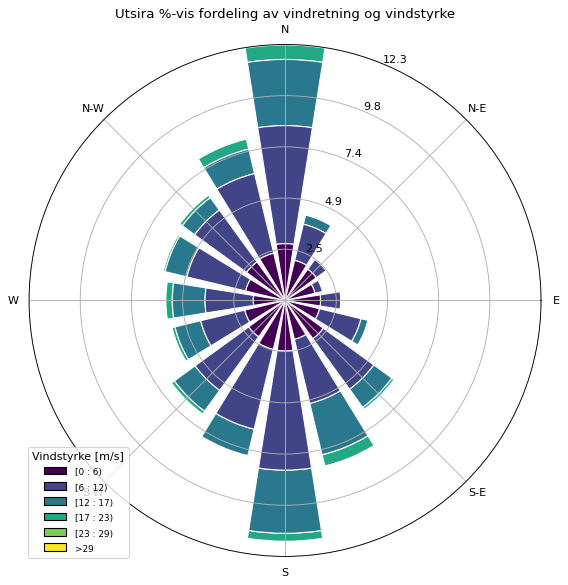

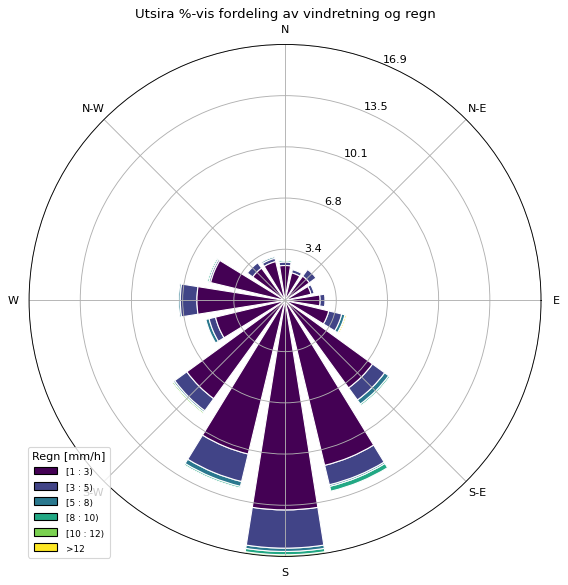

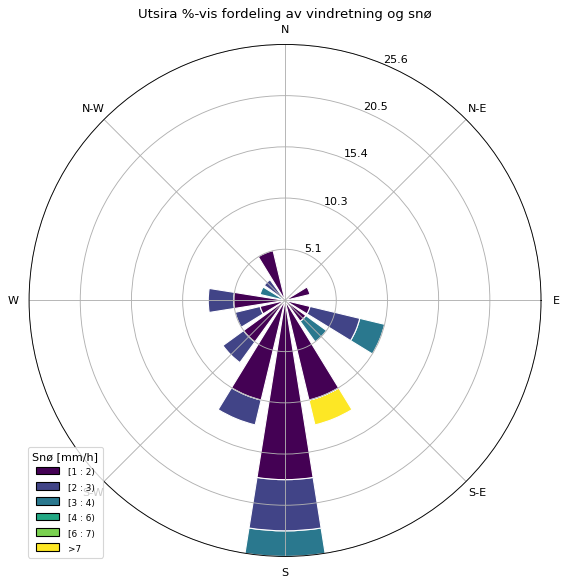

In [150]:
plt.hist([0, 1])
plt.close()
for plot in plots:
    ax = wr.WindroseAxes.from_ax()
    ax.bar(
        plot.wind_direction,
        plot.observation,
        normed=True,
        opening=0.8,
        edgecolor="white",
        cmap=plot.cmap
    )
    ax.set_legend(
        title=plot.legend_title,
        loc="lower left",
        decimal_places=0
    )
    ax.set_title(plot.title)
    plt.savefig(f"../figures/{plot.title}.png")